<a href="https://colab.research.google.com/github/EirikDahle/ML/blob/main/CIFAR_100_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file is my classification of the cifar-100 dataset using AlexNet convolutional neural network (CNN).

Imports and loading data from keras

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from keras.constraints import maxnorm
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, accuracy_score



%matplotlib inline

In [3]:
#importing cifar100 dataset from keras and declaring data split for training and testing 
cifar100 = tf.keras.datasets.cifar100
(X_train,y_train) , (X_test,y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 15s 0us/step


In [4]:
#Checking if dataset imports the correct amount of images. (50000 for training and 10000 for testing)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


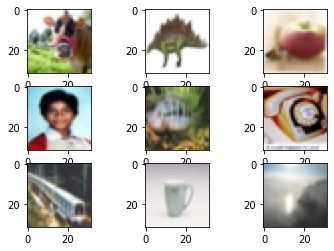

In [5]:
# create a grid of 3x3 images
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i])

# show the plot
plt.show()

Manipulating some data to fit in model.

In [6]:
input_shape = (32, 32, 3)

print(input_shape)

(32, 32, 3)


In [7]:
#normalizing the inputs to fit in range 0-1
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

100
(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


A simplified convolutional neural network model.

In [16]:
# Simple CNN model for CIFAR-100
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_constraint=maxnorm(3.)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu' , padding='same', kernel_constraint=maxnorm(3.)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu' , kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss= 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2048)             

The AlexNet convolutional neural network model i've chosen to look at and to train my data.

In [9]:
#AlexNet model
AlexNet = keras.models.Sequential([
keras.layers.Conv2D(filters=96, kernel_size=(2,2), strides=(4,4), activation='relu', input_shape=(32, 32, 3)),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
keras.layers.Conv2D(filters=256, kernel_size=(2,2), strides=(1,1), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
keras.layers.Conv2D(filters=384, kernel_size=(2,2), strides=(1,1), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=384, kernel_size=(2,2), strides=(1,1), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=256, kernel_size=(2,2), strides=(1,1), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
keras.layers.Flatten(),
keras.layers.Dense(4096, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(4096, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(num_classes, activation='softmax')
])

AlexNet.compile(loss= 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(AlexNet.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 8, 8, 96)          1248      
                                                                 
 batch_normalization_5 (Batc  (None, 8, 8, 96)         384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         98560     
                                                                 
 batch_normalization_6 (Batc  (None, 4, 4, 256)        1024      
 hNormalization)                                                 
                                                      

Fitting the model with training data and validation data.

In [10]:
# Fit the model
seed = 7
np.random.seed(seed)

history = AlexNet.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=2)

# Final evaluation of the model
scores = AlexNet.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
1563/1563 - 21s - loss: 4.0909 - accuracy: 0.0795 - val_loss: 3.6593 - val_accuracy: 0.1357 - 21s/epoch - 14ms/step
Epoch 2/20
1563/1563 - 13s - loss: 3.5796 - accuracy: 0.1486 - val_loss: 3.3764 - val_accuracy: 0.1876 - 13s/epoch - 8ms/step
Epoch 3/20
1563/1563 - 13s - loss: 3.3017 - accuracy: 0.1971 - val_loss: 3.2306 - val_accuracy: 0.2141 - 13s/epoch - 8ms/step
Epoch 4/20
1563/1563 - 13s - loss: 3.0997 - accuracy: 0.2323 - val_loss: 3.2994 - val_accuracy: 0.2054 - 13s/epoch - 8ms/step
Epoch 5/20
1563/1563 - 13s - loss: 2.9341 - accuracy: 0.2649 - val_loss: 3.0780 - val_accuracy: 0.2530 - 13s/epoch - 8ms/step
Epoch 6/20
1563/1563 - 13s - loss: 2.7951 - accuracy: 0.2905 - val_loss: 2.8967 - val_accuracy: 0.2772 - 13s/epoch - 8ms/step
Epoch 7/20
1563/1563 - 13s - loss: 2.6706 - accuracy: 0.3151 - val_loss: 3.1008 - val_accuracy: 0.2593 - 13s/epoch - 8ms/step
Epoch 8/20
1563/1563 - 13s - loss: 2.5658 - accuracy: 0.3372 - val_loss: 3.3813 - val_accuracy: 0.2214 - 13s/epoch - 

Visualizing some of the data i recieved from the testing.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
2.4095038056373594
Training and validation loss    :  2.4095038056373594 3.0901970744132994
Training and validation accuracy:  0.37758199982345103 0.27126000002026557
313/313 [==============================] - 2s 7ms/step - loss: 3.1358 - accuracy: 0.3168
accuracy : [3.135765790939331, 0.31679999828338623]


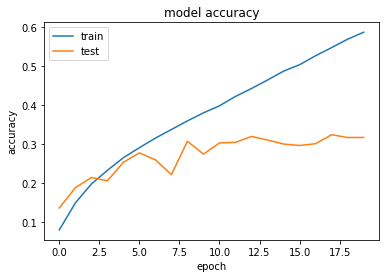

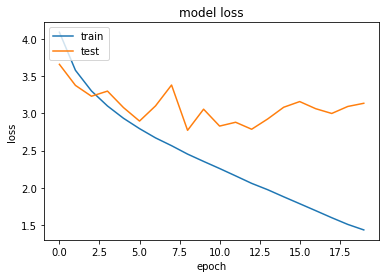

In [33]:
print(history.history.keys())
loss = history.history['loss']
print(np.mean(loss))
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

y_pred = AlexNet.predict(X_test)
score = AlexNet.evaluate(X_test, y_test)
print('accuracy :', score)

epochs = range(1, len(loss)+1)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


-
-
-
-

Can clearly see that this model did not perform that well based on the test data only performing 32% in terms of accuracy. while the model reached 59% using training data. By looking at the graphs we can get an indication of how the model would have performed using more run-throughs (epochs). Accuracy was starting to stagnate and likely would not reach a much higher percentage. while working with this dataset, i have tried multiple models and can conclude that this dataset is quite difficult to predict and reach high accuracy for validation data. Many models did not even reach 30% accuracy and each epoch took a long time making trying out a lot of different solutions difficult.